In [31]:
import numpy as np
import scipy as sp
import seaborn as sns
from itertools import product
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
# import keras.backend as K
# import sys
# import pickle

In [32]:
from matplotlib.collections import LineCollection
from matplotlib.font_manager import FontProperties

from numpy.linalg import LinAlgError
from scipy.sparse.csgraph import laplacian
# from spectral_metric.lib import find_samples, compute_expectation_with_monter_carlo 
from spectral_metric.estimator import CumulativeGradientEstimator
from spectral_metric.visualize import make_graph

from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.optimizers import Adam
from keras.optimizers import SGD
from keras.datasets import mnist
from keras.datasets import cifar10

In [33]:
# Cargar el conjunto de datos CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [34]:
# Mostrar las dimensiones del conjunto de datos

print(f"\nDimensiones del conjunto de entrenamiento:, {x_train.shape}, Número de dimensiones: {x_train.ndim}")
# Verificar las dimensiones de x_train
if x_train.ndim == 3:
    print("x_train es una matriz 3D")
else:
    print("x_train no es una matriz 3D")

print(f"\nDimensiones del conjunto de prueba: {x_test.shape}, Número de dimensiones: {x_test.ndim}")
# Verificar las dimensiones de x_test
if x_test.ndim == 3:
    print("x_test es una matriz 3D")
else:
    print("x_test no es una matriz 3D")

print(f"\nDimensiones de las etiquetas de entrenamiento: {y_train.shape}, Número de dimensiones: {y_train.ndim}")
# Verificar las dimensiones de y_train
if y_train.ndim == 1:
    print("y_train es una matriz 1D")
else:
    print("y_train no es una matriz 1D")

print(f"\nDimensiones de las etiquetas de prueba: {y_test.shape}, Número de dimensiones: {y_test.ndim}")
# Verificar las dimensiones de y_test
if y_test.ndim == 1:
    print("y_test es una matriz 1D")
else:
    print("y_test no es una matriz 1D")


Dimensiones del conjunto de entrenamiento:, (50000, 32, 32, 3), Número de dimensiones: 4
x_train no es una matriz 3D

Dimensiones del conjunto de prueba: (10000, 32, 32, 3), Número de dimensiones: 4
x_test no es una matriz 3D

Dimensiones de las etiquetas de entrenamiento: (50000, 1), Número de dimensiones: 2
y_train no es una matriz 1D

Dimensiones de las etiquetas de prueba: (10000, 1), Número de dimensiones: 2
y_test no es una matriz 1D


In [35]:
# class_names = train_generator.class_names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(class_names)
print(f"Número de clases: {num_classes}")
print(f"Los nombres de las clases son: {class_names}")

Número de clases: 10
Los nombres de las clases son: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [36]:
# Reshape the data

#X = x_train.reshape((x_train.shape[0], -1))
X = x_test.reshape((x_test.shape[0], x_test.shape[1] * x_test.shape[2] * x_test.shape[3]))  # Other way to reshape the array 
Y = y_test.reshape(y_test.shape[0],)   # Convert the array to 1D
print(X.shape)
print(Y.shape)

(10000, 3072)
(10000,)


Dataset complexity: [4.51844906]
Dataset complexity in percentage: 45.184 %
Dataset complexity in percentage: 451.845 %


C:\Users\Cesar\AppData\Local\Temp\ipykernel_3688\1779329661.py:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"Dataset complexity in percentage: {round(float(csg) * 10, 3)} %")
C:\Users\Cesar\AppData\Local\Temp\ipykernel_3688\1779329661.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"Dataset complexity in percentage: {round(float(csg) * 100, 3)} %")
c:\Users\Cesar\Desktop\Proyecto-de-grado-CSG\1 - prueba de CSG\Pruebas en distintos datasets\spectral_metric\visualize.py:48: RuntimeWarning: divide by zero encountered in divide
  similarities = difference.max() / difference * 100
c:\Users\Cesar\Desktop\Proyecto-de-grad

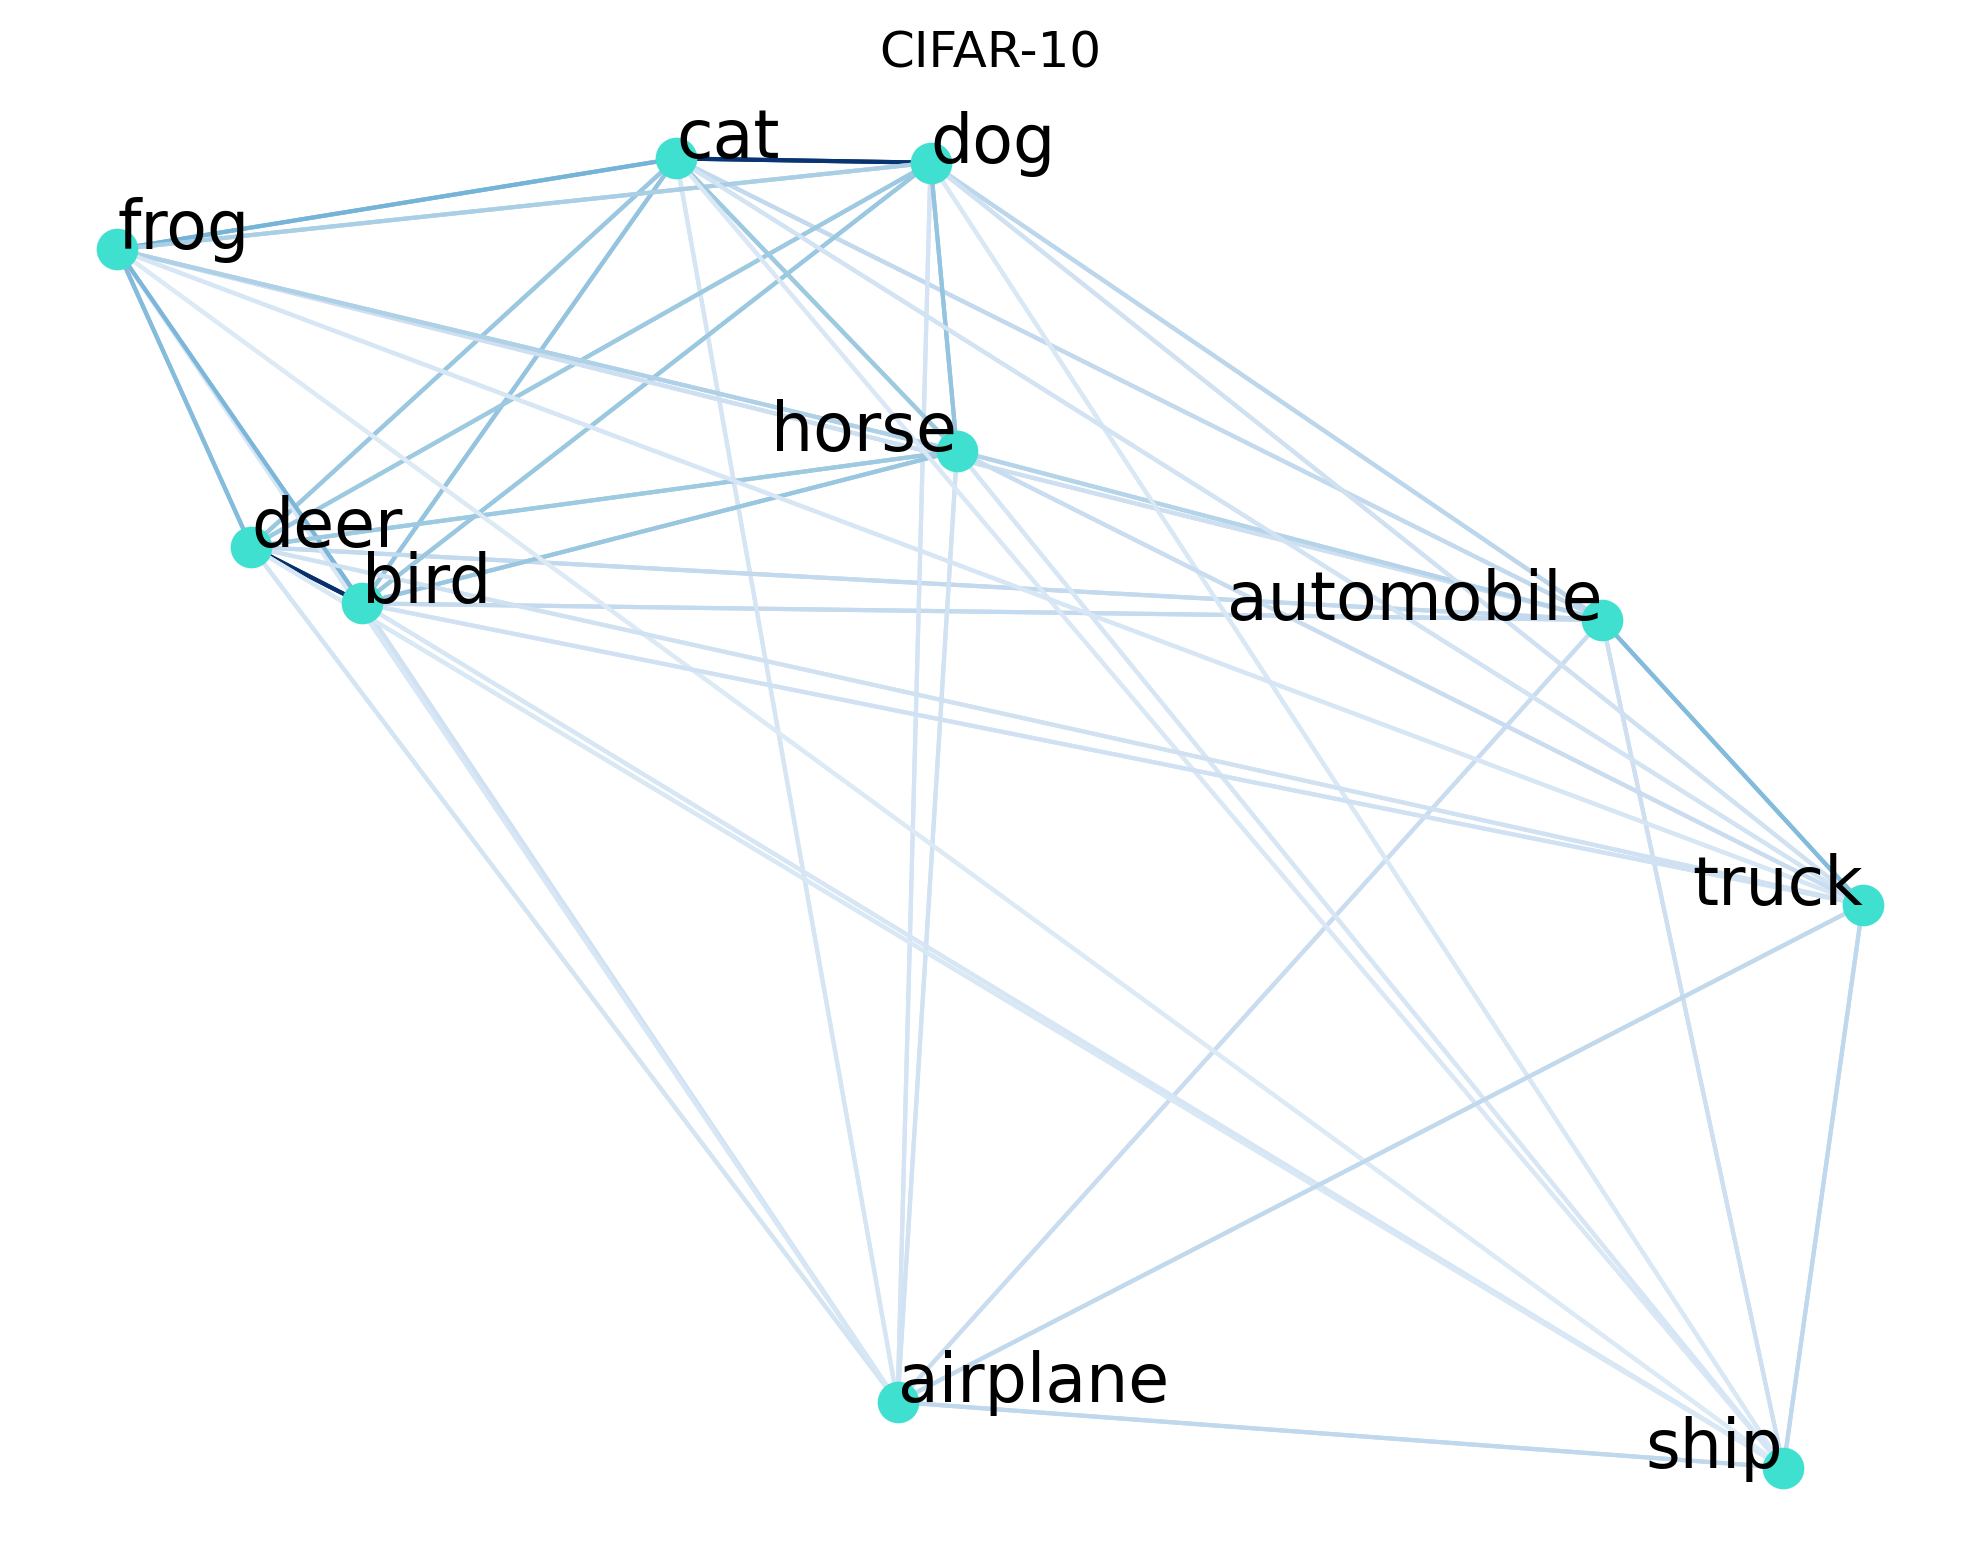

In [37]:
# Apply CSG Metric

estimator = CumulativeGradientEstimator(M_sample=250, k_nearest=5)
estimator.fit(data = X, target = Y)

# Obtain the complexity values
csg = estimator.csg     # The actual or real complexity values
estimator.evals, estimator.evecs     # The eigenvalues and vectors

# Complexity
print(f"Dataset complexity: {csg}")
print(f"Dataset complexity in percentage: {round(float(csg) * 10, 3)} %")
print(f"Dataset complexity in percentage: {round(float(csg) * 100, 3)} %")

# Plot the dataset
make_graph(estimator.difference, title="CIFAR-10", classes=class_names)